In [26]:
import pandas as pd
from statsmodels.graphics.gofplots import qqplot
import pylab as py
import statsmodels.api as sm

In [2]:
df_2009 = pd.read_csv("CrimeRate_2009.csv")
df_2010 = pd.read_csv("CrimeRate_2010.csv")
df_2011 = pd.read_csv("CrimeRate_2011.csv")
# df_2018 = pd.read_csv("CrimeRate_2018.csv")
# df_2019 = pd.read_csv("CrimeRate_2019.csv")
# df_2020 = pd.read_csv("CrimeRate_2020.csv")

In [3]:
# df_2018.head(100)

In [4]:
df_2009.dropna(inplace=True)
df_2010.dropna(inplace=True)
df_2011.dropna(inplace=True)
# df_2018.dropna(inplace=True)
# df_2019.dropna(inplace=True)
# df_2020.dropna(inplace=True)

In [5]:
# df_2018.head(100)

In [6]:
df_2009.loc[0, ["STATE/UT"]] = df_2010.iloc[0]["STATE/UT"]
# df_2018.loc[0, ["STATE/UT"]] = df_2010.iloc[0]["STATE/UT"]
# df_2019.loc[0, ["STATE/UT"]] = df_2010.iloc[0]["STATE/UT"]
# df_2020.loc[0, ["STATE/UT"]] = df_2010.iloc[0]["STATE/UT"]

In [7]:
for i in range(len(df_2009)):
    df_2009.loc[i, ["STATE/UT"]] = df_2009.iloc[i]["STATE/UT"] + "_2009"
    df_2010.loc[i, ["STATE/UT"]] = df_2010.iloc[i]["STATE/UT"] + "_2010"
    df_2011.loc[i, ["STATE/UT"]] = df_2011.iloc[i]["STATE/UT"] + "_2011"
#     df_2018.loc[i, ["STATE/UT"]] = df_2018.iloc[i]["STATE/UT"] + "_2018"
#     df_2019.loc[i, ["STATE/UT"]] = df_2019.iloc[i]["STATE/UT"] + "_2019"
#     df_2020.loc[i, ["STATE/UT"]] = df_2020.iloc[i]["STATE/UT"] + "_2020"

In [8]:
df_2009.head(100)

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27
0,1,A&N ISLANDS_2009,38.0,5.0,7.0,0.0,16.0,5.0,11.0,0.0,...,7.0,114.0,0.0,40.0,8.0,35.0,0.0,1.0,417.0,1035.0
1,2,ANDHRA PRADESH_2009,4604.0,3065.0,240.0,0.0,2521.0,1889.0,632.0,465.0,...,1230.0,65042.0,1220.0,5441.0,4178.0,19018.0,0.0,11301.0,68539.0,234920.0
2,3,ARUNACHAL PRADESH_2009,83.0,48.0,4.0,0.0,61.0,38.0,23.0,47.0,...,25.0,739.0,0.0,70.0,2.0,12.0,0.0,71.0,831.0,2817.0
3,4,ASSAM_2009,1866.0,559.0,56.0,0.0,2875.0,2392.0,483.0,915.0,...,877.0,9487.0,297.0,1614.0,15.0,5753.0,1.0,2639.0,16705.0,71627.0
4,5,BIHAR_2009,5394.0,6169.0,385.0,0.0,4727.0,2397.0,2330.0,1994.0,...,1120.0,26915.0,2908.0,795.0,16.0,4939.0,17.0,3455.0,87779.0,205005.0
5,6,CHANDIGARH_2009,51.0,63.0,15.0,0.0,32.0,29.0,3.0,16.0,...,3.0,101.0,3.0,39.0,6.0,28.0,0.0,8.0,880.0,2354.0
6,7,CHHATTISGARH_2009,1739.0,1350.0,31.0,0.0,373.0,267.0,106.0,406.0,...,324.0,16261.0,353.0,1817.0,235.0,2462.0,0.0,1970.0,24849.0,67070.0
7,8,D&N HAVELI_2009,7.0,12.0,4.0,0.0,16.0,12.0,4.0,20.0,...,2.0,36.0,0.0,2.0,0.0,0.0,0.0,13.0,153.0,694.0
8,9,DAMAN & DIU_2009,11.0,12.0,6.0,0.0,4.0,0.0,4.0,4.0,...,3.0,12.0,0.0,5.0,1.0,4.0,0.0,28.0,97.0,452.0
9,10,DELHI_2009,889.0,716.0,103.0,0.0,625.0,375.0,250.0,172.0,...,15.0,3106.0,242.0,710.0,132.0,658.0,0.0,708.0,14848.0,36263.0


In [9]:
df_2010.head(100)

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,1,A&N ISLANDS_2010,7.0,39.0,5.0,39.0,0.0,39.0,18.0,11.0,...,10.0,105.0,0.0,40.0,14.0,12.0,0.0,9.0,478.0,1028.0
1,2,ANDHRA PRADESH_2010,4239.0,3173.0,266.0,1761.0,0.0,1761.0,2543.0,1722.0,...,972.0,68228.0,1322.0,4622.0,3820.0,21572.0,0.0,11851.0,55789.0,228605.0
2,3,ARUNACHAL PRADESH_2010,103.0,58.0,3.0,49.0,0.0,49.0,81.0,48.0,...,30.0,595.0,0.0,88.0,1.0,11.0,0.0,83.0,788.0,2825.0
3,4,ASSAM_2010,1537.0,471.0,43.0,1629.0,5.0,1624.0,3190.0,2687.0,...,826.0,8132.0,263.0,2020.0,35.0,6208.0,0.0,2471.0,15566.0,69890.0
4,5,BIHAR_2010,5207.0,5418.0,547.0,892.0,0.0,892.0,4518.0,2503.0,...,940.0,23058.0,2508.0,808.0,22.0,3850.0,26.0,3459.0,89073.0,196289.0
5,6,CHANDIGARH_2010,45.0,76.0,18.0,44.0,0.0,44.0,51.0,23.0,...,7.0,75.0,10.0,28.0,2.0,18.0,0.0,6.0,985.0,2583.0
6,7,CHHATTISGARH_2010,1727.0,1449.0,40.0,1198.0,0.0,1198.0,439.0,352.0,...,295.0,17272.0,277.0,1969.0,261.0,2450.0,5.0,2020.0,28562.0,72750.0
7,8,D&N HAVELI_2010,7.0,0.0,1.0,3.0,0.0,3.0,20.0,7.0,...,0.0,24.0,0.0,12.0,2.0,14.0,0.0,26.0,129.0,585.0
8,9,DAMAN & DIU_2010,19.0,8.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,16.0,0.0,2.0,0.0,6.0,0.0,26.0,54.0,266.0
9,10,DELHI_2010,953.0,621.0,80.0,602.0,0.0,602.0,512.0,366.0,...,29.0,3125.0,209.0,794.0,89.0,878.0,0.0,566.0,13372.0,33498.0


In [10]:
df_2011.head(100)

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,1,A&N ISLANDS_2011,18.0,19.0,4.0,28.0,0.0,28.0,16.0,14.0,...,4.0,106.0,0.0,15.0,7.0,8.0,0.0,4.0,386.0,828.0
1,2,ANDHRA PRADESH_2011,5584.0,4239.0,286.0,1758.0,0.0,1758.0,2461.0,1698.0,...,1186.0,73852.0,1400.0,4554.0,4122.0,20719.0,0.0,11837.0,54854.0,238564.0
2,3,ARUNACHAL PRADESH_2011,62.0,27.0,3.0,47.0,0.0,47.0,100.0,67.0,...,31.0,578.0,0.0,69.0,0.0,16.0,0.0,86.0,534.0,2312.0
3,4,ASSAM_2011,1666.0,554.0,48.0,1470.0,0.0,1470.0,3279.0,2838.0,...,831.0,8159.0,146.0,1794.0,26.0,4894.0,2.0,2413.0,16082.0,67146.0
4,5,BIHAR_2011,8898.0,8192.0,562.0,1185.0,1.0,1184.0,5721.0,3565.0,...,1206.0,37623.0,3900.0,1036.0,9.0,5134.0,26.0,5604.0,86175.0,252349.0
5,6,CHANDIGARH_2011,65.0,107.0,3.0,27.0,0.0,27.0,50.0,33.0,...,4.0,52.0,3.0,24.0,11.0,24.0,0.0,12.0,978.0,2690.0
6,7,CHHATTISGARH_2011,1683.0,1297.0,41.0,1257.0,0.0,1257.0,500.0,372.0,...,278.0,19195.0,287.0,1948.0,250.0,2200.0,7.0,1969.0,30337.0,74017.0
7,8,D&N HAVELI_2011,24.0,14.0,0.0,4.0,0.0,4.0,7.0,3.0,...,5.0,31.0,0.0,2.0,1.0,4.0,0.0,26.0,132.0,568.0
8,9,DAMAN & DIU_2011,7.0,1.0,0.0,0.0,0.0,0.0,8.0,8.0,...,0.0,23.0,0.0,0.0,0.0,0.0,0.0,32.0,31.0,330.0
9,10,DELHI_2011,974.0,800.0,95.0,707.0,0.0,707.0,736.0,503.0,...,22.0,3314.0,246.0,865.0,165.0,860.0,0.0,709.0,15546.0,40014.0


In [11]:
# df_2018.head(100)

In [12]:
# df_2019.head(100)

In [13]:
# df_2020.head(100)

In [14]:
df_all = pd.concat([df_2009, df_2010, df_2011])
df_all.head(100)

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,1,A&N ISLANDS_2009,38.0,5.0,7.0,0.0,16.0,5.0,11.0,0.0,...,40.0,8.0,35.0,0.0,1.0,417.0,1035.0,NaN,NaN,NaN
1,2,ANDHRA PRADESH_2009,4604.0,3065.0,240.0,0.0,2521.0,1889.0,632.0,465.0,...,5441.0,4178.0,19018.0,0.0,11301.0,68539.0,234920.0,NaN,NaN,NaN
2,3,ARUNACHAL PRADESH_2009,83.0,48.0,4.0,0.0,61.0,38.0,23.0,47.0,...,70.0,2.0,12.0,0.0,71.0,831.0,2817.0,NaN,NaN,NaN
3,4,ASSAM_2009,1866.0,559.0,56.0,0.0,2875.0,2392.0,483.0,915.0,...,1614.0,15.0,5753.0,1.0,2639.0,16705.0,71627.0,NaN,NaN,NaN
4,5,BIHAR_2009,5394.0,6169.0,385.0,0.0,4727.0,2397.0,2330.0,1994.0,...,795.0,16.0,4939.0,17.0,3455.0,87779.0,205005.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,ODISHA_2011,2340.0,2512.0,100.0,1224.0,0.0,1224.0,1315.0,1107.0,...,691.0,11567.0,858.0,4541.0,313.0,3739.0,3.0,3794.0,27458.0,87129.0
26,27,PUDUCHERRY_2011,138.0,76.0,35.0,29.0,0.0,29.0,24.0,10.0,...,3.0,1097.0,5.0,77.0,20.0,21.0,0.0,216.0,2544.0,5589.0
27,28,PUNJAB_2011,1550.0,2402.0,130.0,598.0,0.0,598.0,880.0,589.0,...,139.0,8740.0,364.0,402.0,34.0,2229.0,0.0,2866.0,12407.0,45423.0
28,29,RAJASTHAN_2011,2378.0,3839.0,160.0,1642.0,0.0,1642.0,2159.0,1461.0,...,767.0,32011.0,673.0,2740.0,13.0,9791.0,0.0,6799.0,95971.0,181407.0


In [15]:
df_all.head(100)

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30
0,1,A&N ISLANDS_2009,38.0,5.0,7.0,0.0,16.0,5.0,11.0,0.0,...,40.0,8.0,35.0,0.0,1.0,417.0,1035.0,NaN,NaN,NaN
1,2,ANDHRA PRADESH_2009,4604.0,3065.0,240.0,0.0,2521.0,1889.0,632.0,465.0,...,5441.0,4178.0,19018.0,0.0,11301.0,68539.0,234920.0,NaN,NaN,NaN
2,3,ARUNACHAL PRADESH_2009,83.0,48.0,4.0,0.0,61.0,38.0,23.0,47.0,...,70.0,2.0,12.0,0.0,71.0,831.0,2817.0,NaN,NaN,NaN
3,4,ASSAM_2009,1866.0,559.0,56.0,0.0,2875.0,2392.0,483.0,915.0,...,1614.0,15.0,5753.0,1.0,2639.0,16705.0,71627.0,NaN,NaN,NaN
4,5,BIHAR_2009,5394.0,6169.0,385.0,0.0,4727.0,2397.0,2330.0,1994.0,...,795.0,16.0,4939.0,17.0,3455.0,87779.0,205005.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26,ODISHA_2011,2340.0,2512.0,100.0,1224.0,0.0,1224.0,1315.0,1107.0,...,691.0,11567.0,858.0,4541.0,313.0,3739.0,3.0,3794.0,27458.0,87129.0
26,27,PUDUCHERRY_2011,138.0,76.0,35.0,29.0,0.0,29.0,24.0,10.0,...,3.0,1097.0,5.0,77.0,20.0,21.0,0.0,216.0,2544.0,5589.0
27,28,PUNJAB_2011,1550.0,2402.0,130.0,598.0,0.0,598.0,880.0,589.0,...,139.0,8740.0,364.0,402.0,34.0,2229.0,0.0,2866.0,12407.0,45423.0
28,29,RAJASTHAN_2011,2378.0,3839.0,160.0,1642.0,0.0,1642.0,2159.0,1461.0,...,767.0,32011.0,673.0,2740.0,13.0,9791.0,0.0,6799.0,95971.0,181407.0


In [16]:
df_all.sort_values(by=['STATE/UT'], inplace=True)
df_all.dropna(inplace=True, axis=1)
df_all.drop(['C27'], axis=1, inplace=True)
df_all.head(100)

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26
0,1,A&N ISLANDS_2009,38.0,5.0,7.0,0.0,16.0,5.0,11.0,0.0,...,0.0,7.0,114.0,0.0,40.0,8.0,35.0,0.0,1.0,417.0
0,1,A&N ISLANDS_2010,7.0,39.0,5.0,39.0,0.0,39.0,18.0,11.0,...,51.0,8.0,29.0,0.0,10.0,105.0,0.0,40.0,14.0,12.0
0,1,A&N ISLANDS_2011,18.0,19.0,4.0,28.0,0.0,28.0,16.0,14.0,...,42.0,5.0,39.0,0.0,4.0,106.0,0.0,15.0,7.0,8.0
1,2,ANDHRA PRADESH_2009,4604.0,3065.0,240.0,0.0,2521.0,1889.0,632.0,465.0,...,289.0,1230.0,65042.0,1220.0,5441.0,4178.0,19018.0,0.0,11301.0,68539.0
1,2,ANDHRA PRADESH_2010,4239.0,3173.0,266.0,1761.0,0.0,1761.0,2543.0,1722.0,...,9455.0,1025.0,8823.0,237.0,972.0,68228.0,1322.0,4622.0,3820.0,21572.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,32,TRIPURA_2011,306.0,107.0,0.0,258.0,0.0,258.0,153.0,113.0,...,601.0,51.0,120.0,14.0,31.0,2571.0,57.0,455.0,9.0,1776.0
32,33,UTTAR PRADESH_2009,12365.0,10499.0,3551.0,0.0,12393.0,10487.0,1906.0,1649.0,...,786.0,424.0,23735.0,9203.0,4026.0,3878.0,31807.0,0.0,11637.0,80430.0
32,33,UTTAR PRADESH_2010,11784.0,10207.0,3592.0,2580.0,5.0,2575.0,13727.0,11903.0,...,29922.0,6572.0,20166.0,280.0,360.0,23829.0,9250.0,4189.0,15.0,29853.0
32,33,UTTAR PRADESH_2011,14093.0,12240.0,3801.0,3571.0,0.0,3571.0,21986.0,19299.0,...,37854.0,7155.0,27399.0,218.0,1323.0,26108.0,9795.0,5252.0,3.0,33465.0


In [17]:
df_all['GraveCrimes'] = df_all.iloc[:, 2:8].sum(axis=1)

In [18]:
df_all['PettyCrimes'] = df_all.iloc[:, 8:].sum(axis=1)

In [19]:
df_all['CrimeRatio'] = df_all['GraveCrimes']/df_all['PettyCrimes']

In [20]:
df_all.head(100)

,SL,STATE/UT,C1,C2,C3,C4,C5,C6,C7,C8,...,C20,C21,C22,C23,C24,C25,C26,GraveCrimes,PettyCrimes,CrimeRatio
0,1,A&N ISLANDS_2009,38.0,5.0,7.0,0.0,16.0,5.0,11.0,0.0,...,0.0,40.0,8.0,35.0,0.0,1.0,417.0,71.0,1060.0,0.066981
0,1,A&N ISLANDS_2010,7.0,39.0,5.0,39.0,0.0,39.0,18.0,11.0,...,0.0,10.0,105.0,0.0,40.0,14.0,12.0,129.0,687.0,0.187773
0,1,A&N ISLANDS_2011,18.0,19.0,4.0,28.0,0.0,28.0,16.0,14.0,...,0.0,4.0,106.0,0.0,15.0,7.0,8.0,97.0,543.0,0.178637
1,2,ANDHRA PRADESH_2009,4604.0,3065.0,240.0,0.0,2521.0,1889.0,632.0,465.0,...,1220.0,5441.0,4178.0,19018.0,0.0,11301.0,68539.0,12319.0,247804.0,0.049713
1,2,ANDHRA PRADESH_2010,4239.0,3173.0,266.0,1761.0,0.0,1761.0,2543.0,1722.0,...,237.0,972.0,68228.0,1322.0,4622.0,3820.0,21572.0,11200.0,186077.0,0.060190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,32,TRIPURA_2011,306.0,107.0,0.0,258.0,0.0,258.0,153.0,113.0,...,14.0,31.0,2571.0,57.0,455.0,9.0,1776.0,929.0,8218.0,0.113045
32,33,UTTAR PRADESH_2009,12365.0,10499.0,3551.0,0.0,12393.0,10487.0,1906.0,1649.0,...,9203.0,4026.0,3878.0,31807.0,0.0,11637.0,80430.0,49295.0,306667.0,0.160744
32,33,UTTAR PRADESH_2010,11784.0,10207.0,3592.0,2580.0,5.0,2575.0,13727.0,11903.0,...,280.0,360.0,23829.0,9250.0,4189.0,15.0,29853.0,30743.0,224692.0,0.136823
32,33,UTTAR PRADESH_2011,14093.0,12240.0,3801.0,3571.0,0.0,3571.0,21986.0,19299.0,...,218.0,1323.0,26108.0,9795.0,5252.0,3.0,33465.0,37276.0,278300.0,0.133942


In [21]:
df_all.to_csv("CrimeDistribution.csv")

<AxesSubplot:>

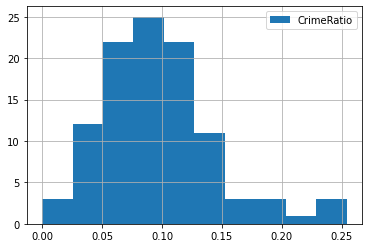

In [29]:
df_all['CrimeRatio'].hist(legend=True)

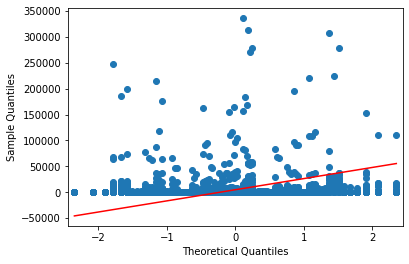

In [31]:
sm.qqplot(df_all.iloc[:, 2:], line ='s')
py.show()

In [35]:
df_all.loc[:, ['CrimeRatio']]

,CrimeRatio
0,0.066981
0,0.187773
0,0.178637
1,0.049713
1,0.060190
...,...
33,0.113865
33,0.110317
34,0.237635
34,0.100936


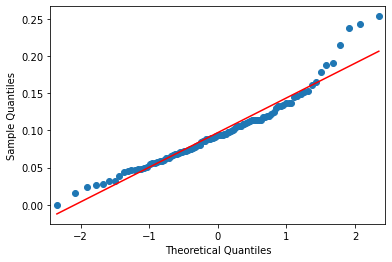

In [33]:
sm.qqplot(df_all.iloc[:, 30], line ='s')
py.show()

In [23]:
len(df_all)

105

  SL          STATE/UT  CrimeRatio
0  1  A&N ISLANDS_2009    0.066981
0  1  A&N ISLANDS_2010    0.187773
0  1  A&N ISLANDS_2011    0.178637

Q-Q Plot


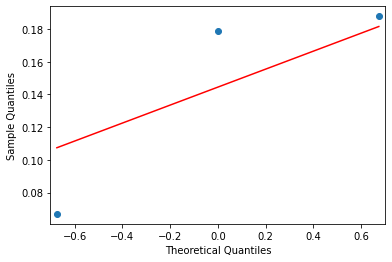


Shapiro Wilk Test
Statistics=0.806, p=0.130 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.417
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


  SL             STATE/UT  CrimeRatio
1  2  ANDHRA PRADESH_2009    0.049713
1  2  ANDHRA PRADESH_2010    0.060190
1  2  ANDHRA PRADESH_2011    0.068593

Q-Q Plot


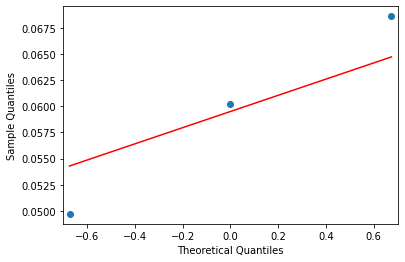


Shapiro Wilk Test
Statistics=0.996, p=0.879 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.194
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


  SL                STATE/UT  CrimeRatio
2  3  ARUNACHAL PRADESH_2009    0.078497
2  3  ARUNACHAL PRADESH_2010    0.106504
2  3  ARUNACHAL PRADESH_2011    0.086151

Q-Q Plot


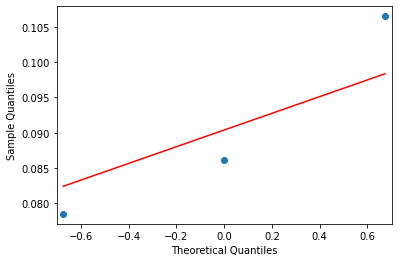


Shapiro Wilk Test
Statistics=0.936, p=0.511 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.262
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


  SL    STATE/UT  CrimeRatio
3  4  ASSAM_2009    0.098590
3  4  ASSAM_2010    0.080744
3  4  ASSAM_2011    0.084346

Q-Q Plot


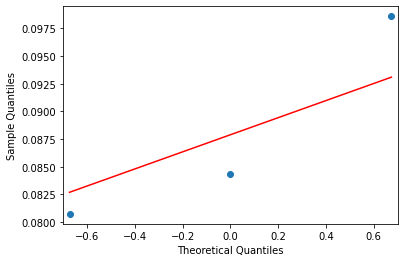


Shapiro Wilk Test
Statistics=0.894, p=0.367 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.311
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


  SL    STATE/UT  CrimeRatio
4  5  BIHAR_2009    0.088854
4  5  BIHAR_2010    0.108983
4  5  BIHAR_2011    0.113742

Q-Q Plot


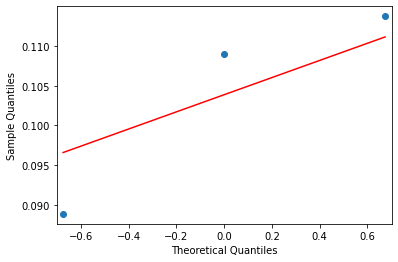


Shapiro Wilk Test
Statistics=0.887, p=0.346 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.319
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


  SL         STATE/UT  CrimeRatio
5  6  CHANDIGARH_2009    0.069166
5  6  CHANDIGARH_2010    0.104176
5  6  CHANDIGARH_2011    0.094550

Q-Q Plot


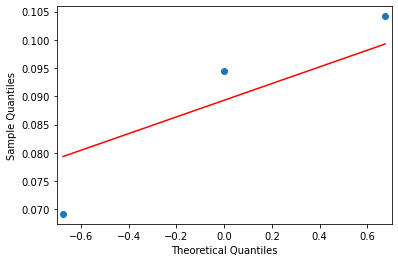


Shapiro Wilk Test
Statistics=0.937, p=0.514 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.261
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


  SL           STATE/UT  CrimeRatio
6  7  CHHATTISGARH_2009    0.056033
6  7  CHHATTISGARH_2010    0.119239
6  7  CHHATTISGARH_2011    0.119248

Q-Q Plot


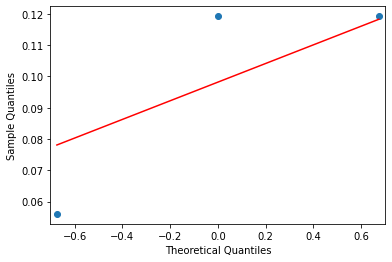


Shapiro Wilk Test
Statistics=0.750, p=0.000 
Sample does not look Gaussian (reject H0)


Anderson-Darling Test

Statistic: 0.488
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


  SL         STATE/UT  CrimeRatio
7  8  D&N HAVELI_2009    0.071329
7  8  D&N HAVELI_2010    0.027184
7  8  D&N HAVELI_2011    0.091089

Q-Q Plot


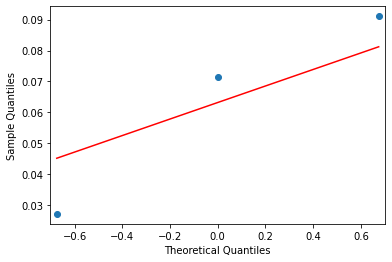


Shapiro Wilk Test
Statistics=0.954, p=0.586 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.242
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


  SL          STATE/UT  CrimeRatio
8  9  DAMAN & DIU_2009    0.076389
8  9  DAMAN & DIU_2010    0.136986
8  9  DAMAN & DIU_2011    0.026846

Q-Q Plot


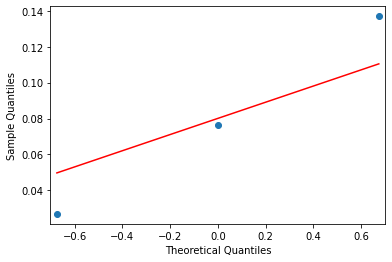


Shapiro Wilk Test
Statistics=0.997, p=0.889 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.193
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


   SL    STATE/UT  CrimeRatio
9  10  DELHI_2009    0.062965
9  10  DELHI_2010    0.101799
9  10  DELHI_2011    0.094685

Q-Q Plot


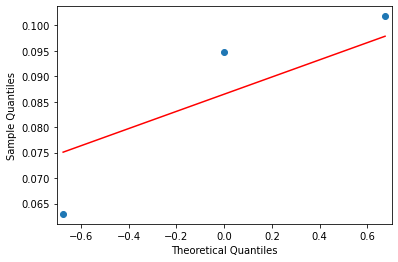


Shapiro Wilk Test
Statistics=0.882, p=0.330 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.325
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL  STATE/UT  CrimeRatio
10  11  GOA_2009    0.074772
10  11  GOA_2010    0.073239
10  11  GOA_2011    0.088048

Q-Q Plot


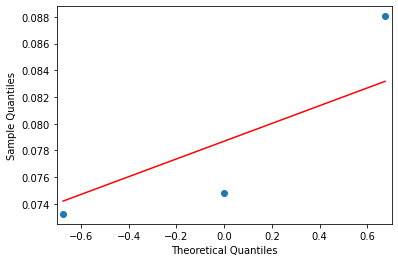


Shapiro Wilk Test
Statistics=0.827, p=0.180 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.392
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL      STATE/UT  CrimeRatio
11  12  GUJARAT_2009    0.047315
11  12  GUJARAT_2010    0.059296
11  12  GUJARAT_2011    0.057417

Q-Q Plot


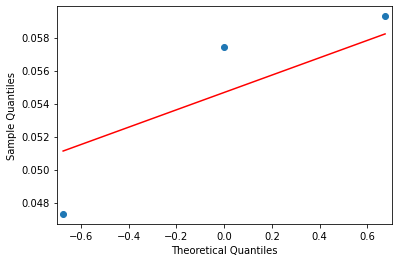


Shapiro Wilk Test
Statistics=0.864, p=0.280 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.346
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL      STATE/UT  CrimeRatio
12  13  HARYANA_2009    0.072174
12  13  HARYANA_2010    0.114598
12  13  HARYANA_2011    0.117997

Q-Q Plot


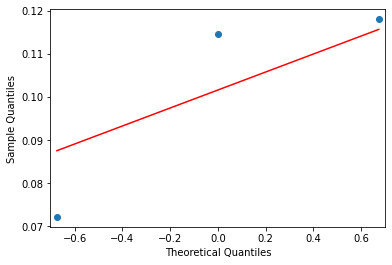


Shapiro Wilk Test
Statistics=0.805, p=0.127 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.418
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL               STATE/UT  CrimeRatio
13  14  HIMACHAL PRADESH_2009    0.032282
13  14  HIMACHAL PRADESH_2010    0.080264
13  14  HIMACHAL PRADESH_2011    0.075399

Q-Q Plot


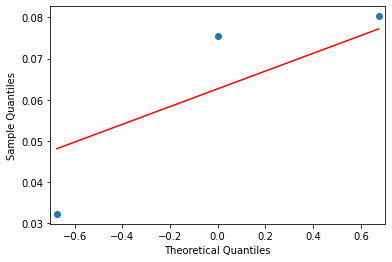


Shapiro Wilk Test
Statistics=0.825, p=0.176 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.393
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL              STATE/UT  CrimeRatio
14  15  JAMMU & KASHMIR_2009    0.077842
14  15  JAMMU & KASHMIR_2010    0.094382
14  15  JAMMU & KASHMIR_2011    0.094265

Q-Q Plot


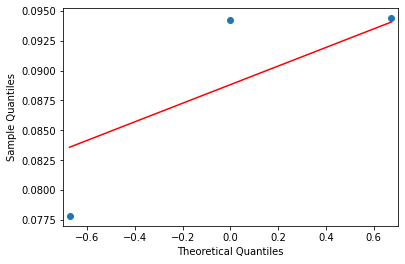


Shapiro Wilk Test
Statistics=0.755, p=0.012 
Sample does not look Gaussian (reject H0)


Anderson-Darling Test

Statistic: 0.481
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL        STATE/UT  CrimeRatio
15  16  JHARKHAND_2009    0.093589
15  16  JHARKHAND_2010    0.153021
15  16  JHARKHAND_2011    0.149693

Q-Q Plot


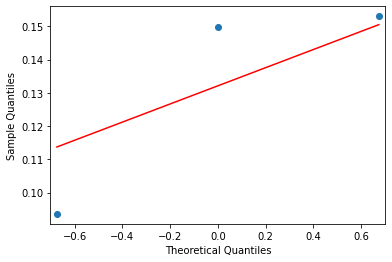


Shapiro Wilk Test
Statistics=0.792, p=0.095 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.435
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL        STATE/UT  CrimeRatio
16  17  KARNATAKA_2009    0.058238
16  17  KARNATAKA_2010    0.089695
16  17  KARNATAKA_2011    0.088310

Q-Q Plot


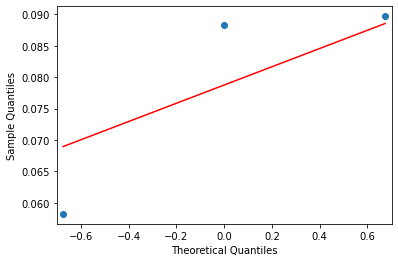


Shapiro Wilk Test
Statistics=0.783, p=0.074 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.446
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL     STATE/UT  CrimeRatio
17  18  KERALA_2009    0.016369
17  18  KERALA_2010    0.031259
17  18  KERALA_2011    0.044833

Q-Q Plot


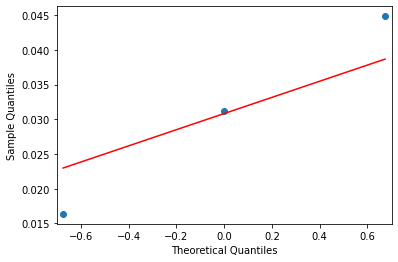


Shapiro Wilk Test
Statistics=0.999, p=0.949 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.190
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL          STATE/UT  CrimeRatio
18  19  LAKSHADWEEP_2009    0.038793
18  19  LAKSHADWEEP_2010    0.000000
18  19  LAKSHADWEEP_2011    0.048387

Q-Q Plot


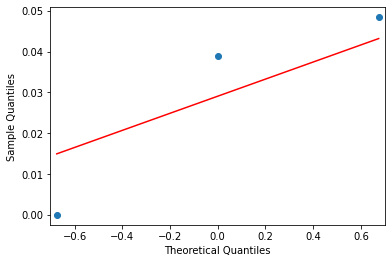


Shapiro Wilk Test
Statistics=0.892, p=0.360 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.314
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL             STATE/UT  CrimeRatio
19  20  MADHYA PRADESH_2009    0.043405
19  20  MADHYA PRADESH_2010    0.118504
19  20  MADHYA PRADESH_2011    0.125490

Q-Q Plot


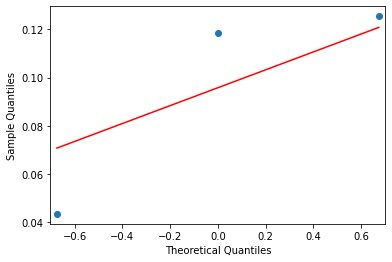


Shapiro Wilk Test
Statistics=0.813, p=0.147 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.408
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL          STATE/UT  CrimeRatio
20  21  MAHARASHTRA_2009    0.051240
20  21  MAHARASHTRA_2010    0.063422
20  21  MAHARASHTRA_2011    0.071490

Q-Q Plot


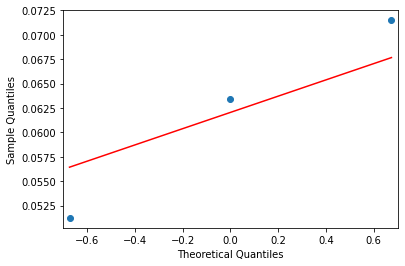


Shapiro Wilk Test
Statistics=0.986, p=0.777 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.205
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL      STATE/UT  CrimeRatio
21  22  MANIPUR_2009    0.253948
21  22  MANIPUR_2010    0.165821
21  22  MANIPUR_2011    0.190726

Q-Q Plot


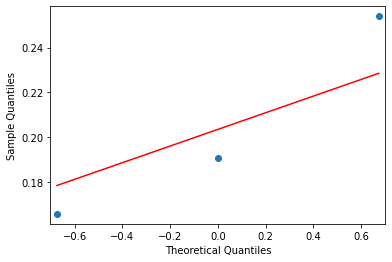


Shapiro Wilk Test
Statistics=0.941, p=0.530 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.257
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL        STATE/UT  CrimeRatio
22  23  MEGHALAYA_2009    0.132796
22  23  MEGHALAYA_2010    0.243214
22  23  MEGHALAYA_2011    0.215734

Q-Q Plot


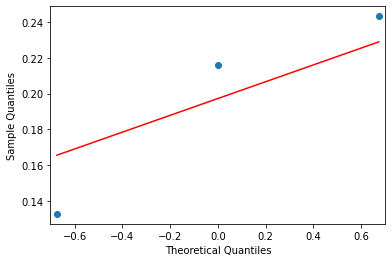


Shapiro Wilk Test
Statistics=0.922, p=0.461 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.278
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL      STATE/UT  CrimeRatio
23  24  MIZORAM_2009    0.024062
23  24  MIZORAM_2010    0.130929
23  24  MIZORAM_2011    0.099082

Q-Q Plot


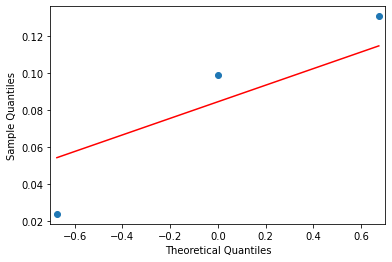


Shapiro Wilk Test
Statistics=0.948, p=0.562 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.248
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL       STATE/UT  CrimeRatio
24  25  NAGALAND_2009    0.105572
24  25  NAGALAND_2010    0.114593
24  25  NAGALAND_2011    0.136408

Q-Q Plot


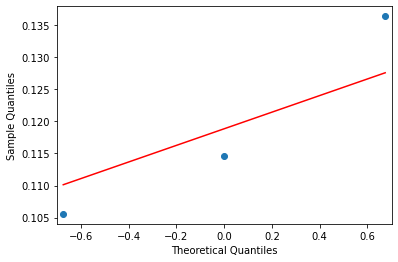


Shapiro Wilk Test
Statistics=0.946, p=0.551 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.251
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL     STATE/UT  CrimeRatio
25  26  ODISHA_2009    0.068548
25  26  ODISHA_2010    0.113903
25  26  ODISHA_2011    0.111779

Q-Q Plot


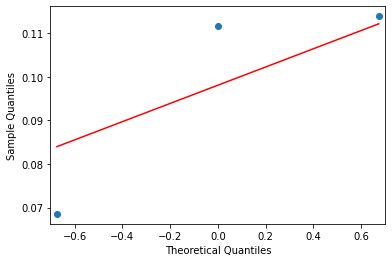


Shapiro Wilk Test
Statistics=0.785, p=0.079 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.443
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL         STATE/UT  CrimeRatio
26  27  PUDUCHERRY_2009    0.047019
26  27  PUDUCHERRY_2010    0.072016
26  27  PUDUCHERRY_2011    0.098492

Q-Q Plot


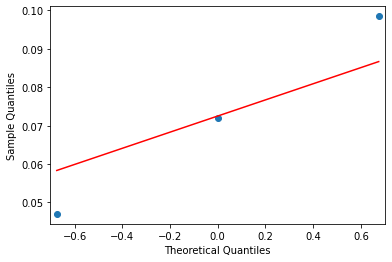


Shapiro Wilk Test
Statistics=1.000, p=0.968 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.190
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL     STATE/UT  CrimeRatio
27  28  PUNJAB_2009    0.113868
27  28  PUNJAB_2010    0.151499
27  28  PUNJAB_2011    0.146173

Q-Q Plot


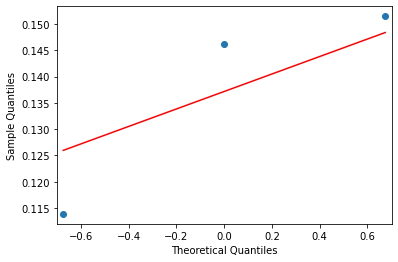


Shapiro Wilk Test
Statistics=0.854, p=0.250 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.359
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL        STATE/UT  CrimeRatio
28  29  RAJASTHAN_2009    0.048736
28  29  RAJASTHAN_2010    0.095017
28  29  RAJASTHAN_2011    0.106615

Q-Q Plot


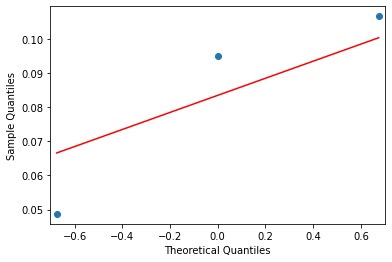


Shapiro Wilk Test
Statistics=0.893, p=0.364 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.312
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL     STATE/UT  CrimeRatio
29  30  SIKKIM_2009    0.054827
29  30  SIKKIM_2010    0.085427
29  30  SIKKIM_2011    0.132428

Q-Q Plot


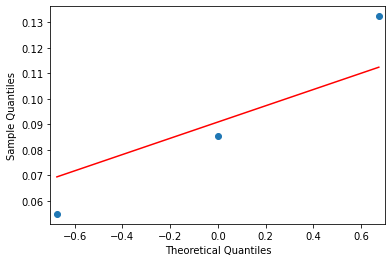


Shapiro Wilk Test
Statistics=0.985, p=0.768 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.206
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL         STATE/UT  CrimeRatio
30  31  TAMIL NADU_2009    0.056412
30  31  TAMIL NADU_2010    0.108798
30  31  TAMIL NADU_2011    0.121857

Q-Q Plot


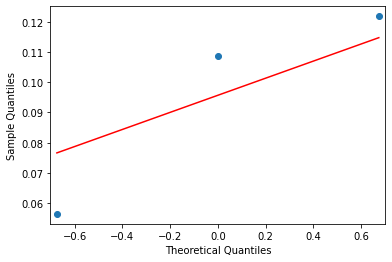


Shapiro Wilk Test
Statistics=0.893, p=0.362 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.313
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL      STATE/UT  CrimeRatio
31  32  TRIPURA_2009    0.065082
31  32  TRIPURA_2010    0.145766
31  32  TRIPURA_2011    0.113045

Q-Q Plot


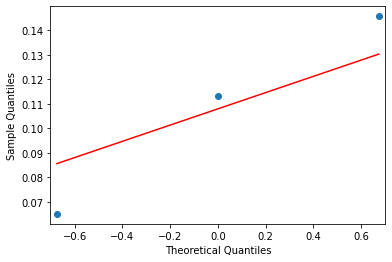


Shapiro Wilk Test
Statistics=0.988, p=0.793 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.203
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL            STATE/UT  CrimeRatio
32  33  UTTAR PRADESH_2009    0.160744
32  33  UTTAR PRADESH_2010    0.136823
32  33  UTTAR PRADESH_2011    0.133942

Q-Q Plot


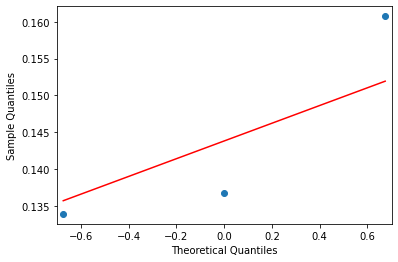


Shapiro Wilk Test
Statistics=0.830, p=0.187 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.388
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL          STATE/UT  CrimeRatio
33  34  UTTARAKHAND_2009    0.093018
33  34  UTTARAKHAND_2010    0.113865
33  34  UTTARAKHAND_2011    0.110317

Q-Q Plot


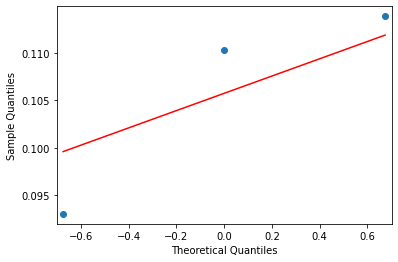


Shapiro Wilk Test
Statistics=0.873, p=0.305 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.335
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)


    SL          STATE/UT  CrimeRatio
34  35  WEST BENGAL_2009    0.237635
34  35  WEST BENGAL_2010    0.100936
34  35  WEST BENGAL_2011    0.089551

Q-Q Plot


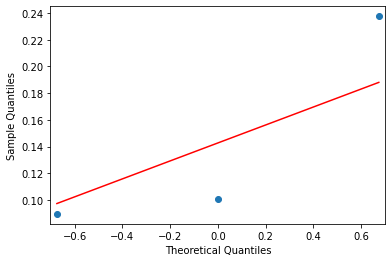


Shapiro Wilk Test
Statistics=0.807, p=0.132 
Sample looks Gaussian (fail to reject H0)


Anderson-Darling Test

Statistic: 0.416
15.000: -1.296, data does not look normal (reject H0)


10.000: -1.476, data does not look normal (reject H0)


5.000: -1.771, data does not look normal (reject H0)


2.500: -2.065, data does not look normal (reject H0)


1.000: -2.457, data does not look normal (reject H0)




In [24]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import normaltest
from scipy.stats import anderson
for i in range(int(len(df_all)/3)):
    df_1 = df_all.iloc[i*3:i*3+3, :]
#     try:
    print(df_1.iloc[:, [0,1,30]])
    print('\nQ-Q Plot')
    qqplot(df_1['CrimeRatio'], line='s')
    plt.show()
    print('\nShapiro Wilk Test')
    stat, p = shapiro(df_1['CrimeRatio'])
    print('Statistics=%.3f, p=%.3f ' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)\n\n')
    else:
        print('Sample does not look Gaussian (reject H0)\n\n')
    print('Anderson-Darling Test\n')
    result = anderson(df_1['CrimeRatio'])
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, data looks normal (fail to reject H0)\n\n' % (sl, cv))
        else:
            print('%.3f: %.3f, data does not look normal (reject H0)\n\n' % (sl, cv))
#     except:
#         print(df_1)